Задание 7. Описательная статистика

Инструкция:

Шаг 1.  Изучите материалы лекционных и практических занятий по темам раздела 5.  

Шаг 2. Выполните описательный анализ признаков предложенного датасета (Алгоритм выполнения представлен в практическом занятии по теме 5.1):

2.1 Загрузите датасет;

2.2 Разделите признаки на две группы: категориальные и непрерывные;

2.3 Для каждого из категориальных признаков:
- рассчитайте моду;
- постройте столбчатую диаграмму, отражающую число объектов по каждому значению признака (выбор библиотеки визуализации и соответствующих методов остается за исполнителем);
- на диаграмме каждый столбец должен сопровождаться надписью о количестве элементов с данным значением;   

2.4 Для каждого из непрерывных признаков:
- рассчитайте выборочное среднее, медиану, моду, квартили (0.01, 0.05 и 0.95, 0.99), значения нижнего и верхнего усов;
- постройте вертикальные линии, соответствующие рассчитанным статистикам. Рисунок оснастите легендой;
- постройте плотность распределения и гистограмму;
- объедините на одном графике плотность распределения и вертикальные линии статистик.

Шаг 3. Опубликуйте файл расширения ipynb на платформе Odin

**Описание данных**

Каждый клиент характеризуется следующим набором данных:

|Признак|Описание признака|
|---:|:---|
|`userid`|идентификатор пользователя|
|`score`|баллы кредитного скоринга|
|`City`|город проживания клиента|
|`Gender`|пол|
|`Age`|возраст|
|`Objects`|количество объектов в собственности|
|`Balance`|баланс на счете|
|`Products`|количество продуктов, которыми пользуется клиент|
|`estimated_salary`|заработная плата клиента|

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [37]:
# Загрузите датасет;

df = pd.read_csv('./clients_bank.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 703.2+ KB


In [94]:
# Разделите признаки на две группы: категориальные и непрерывные;

features_cat = 'City,Gender,Objects,Products'.split(',')
features_num = list(set(df.columns) -set(["userid"]) -set(features_cat))

In [149]:
# Для каждого из категориальных признаков:
# рассчитайте моду;
# постройте столбчатую диаграмму
# на диаграмме каждый столбец должен сопровождаться надписью о количестве элементов с данным значением;
# {col: df[col].nunique() for col in features_cat}

df_cat = df[features_cat]
mode_cat = df_cat.mode()
mode_cat.index = ['feature']
mode_cat_counts = {col: (df_cat[col] == mode_cat[col].iloc[0]).sum() for col in features_cat}
mode_cat = pd.concat([mode_cat, pd.DataFrame(mode_cat_counts, index=['counts'])])
mode_cat

,City,Gender,Objects,Products
feature,Ярославль,М,2,1
counts,5014,5457,1048,5084


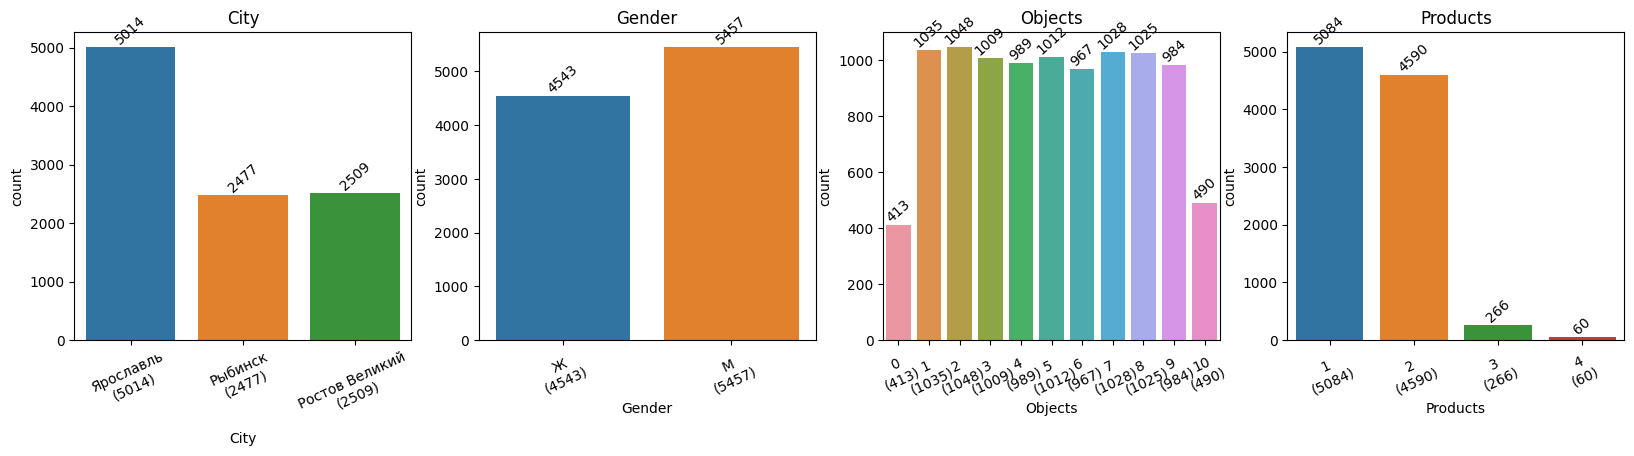

In [219]:
# _, axs = plt.subplot_mosaic('111223333333444', figsize = (16, 4))
plt.subplots(1, len(features_cat), figsize = (20, 4))

for i,col in enumerate(features_cat):
    series = df_cat[col]
    plt.subplot(1, len(features_cat), i+1)
    axes = sns.countplot(df_cat, x=col)
    axes.set_title(col)
    axes.bar_label(axes.containers[0], rotation=42)
    
    ticks = [t.get_text() for t in axes.get_xticklabels()]
    counts = [int(r.get_height()) for r in axes.containers[0]]#[(series == t).sum() for t in ticks]
    *ticks, = map(lambda t,c: '%s\n(%d)'%(t,c), ticks, counts)
#     print(ticks)
    axes.set_xticklabels(ticks, rotation=25)

In [147]:
# Для каждого из непрерывных признаков:
# рассчитайте выборочное среднее, медиану, моду, квартили (0.01, 0.05 и 0.95, 0.99), значения нижнего и верхнего усов;
# постройте вертикальные линии, соответствующие рассчитанным статистикам. Рисунок оснастите легендой;
# постройте плотность распределения и гистограмму;
# объедините на одном графике плотность распределения и вертикальные линии статистик.
def whiskers(df, like_calc_boxplot=False):
    k = 1.5
    high, low = df.quantile(.75), df.quantile(.25)
    iqr = high-low
    wisk_df = pd.DataFrame([low-k*iqr, high+k*iqr], index=['wisk_low', 'wisk_high'])
    
    if not like_calc_boxplot:
        return wisk_df
    else:
        data = []
        for col in df:
            low, high = wisk_df[col]
            series = df[col]
            elow = series[series >= low].min()
            ehigh = series[series <= high].max()
            data.append(pd.Series([elow, ehigh], index=['ewisk_low', 'ewisk_high'], name=col))
        return pd.DataFrame(data).T

re_strip = re.compile(r'^(\w+)([(]\.(.+)[)])?.*$')


stats = 'mean(),median(),mode().iloc[0],quantile(.01),quantile(.05),quantile(.95),quantile(.99)'.split(',')
df_num = df[features_num]

data_stats = []
for stat in stats:
    caption = re_strip.sub(lambda m: m[1] if m[3] is None else '%s_%d' % (m[1], int(m[3])), stat)
    stat_series = eval('df_num.%s' % stat)
    stat_series.name = caption
    data_stats.append(stat_series)
df_num_stats = pd.concat([pd.DataFrame(data_stats), whiskers(df_num, like_calc_boxplot=True)])
df_num_stats

,score,Balance,estimated_salary,Age
mean,650.5288,119827.493793,100090.239881,38.9218
median,652.0000,119839.690000,100193.915000,37.0000
mode,850.0000,105473.740000,24924.920000,37.0000
quantile_1,432.0000,47505.449000,1842.825300,21.0000
quantile_5,489.0000,70367.943000,9851.818500,25.0000
quantile_95,812.0000,169984.256000,190155.375500,60.0000
quantile_99,850.0000,190495.170600,198069.734500,72.0000
ewisk_low,383.0000,41299.030000,11.580000,18.0000
ewisk_high,850.0000,198338.770000,199992.480000,62.0000


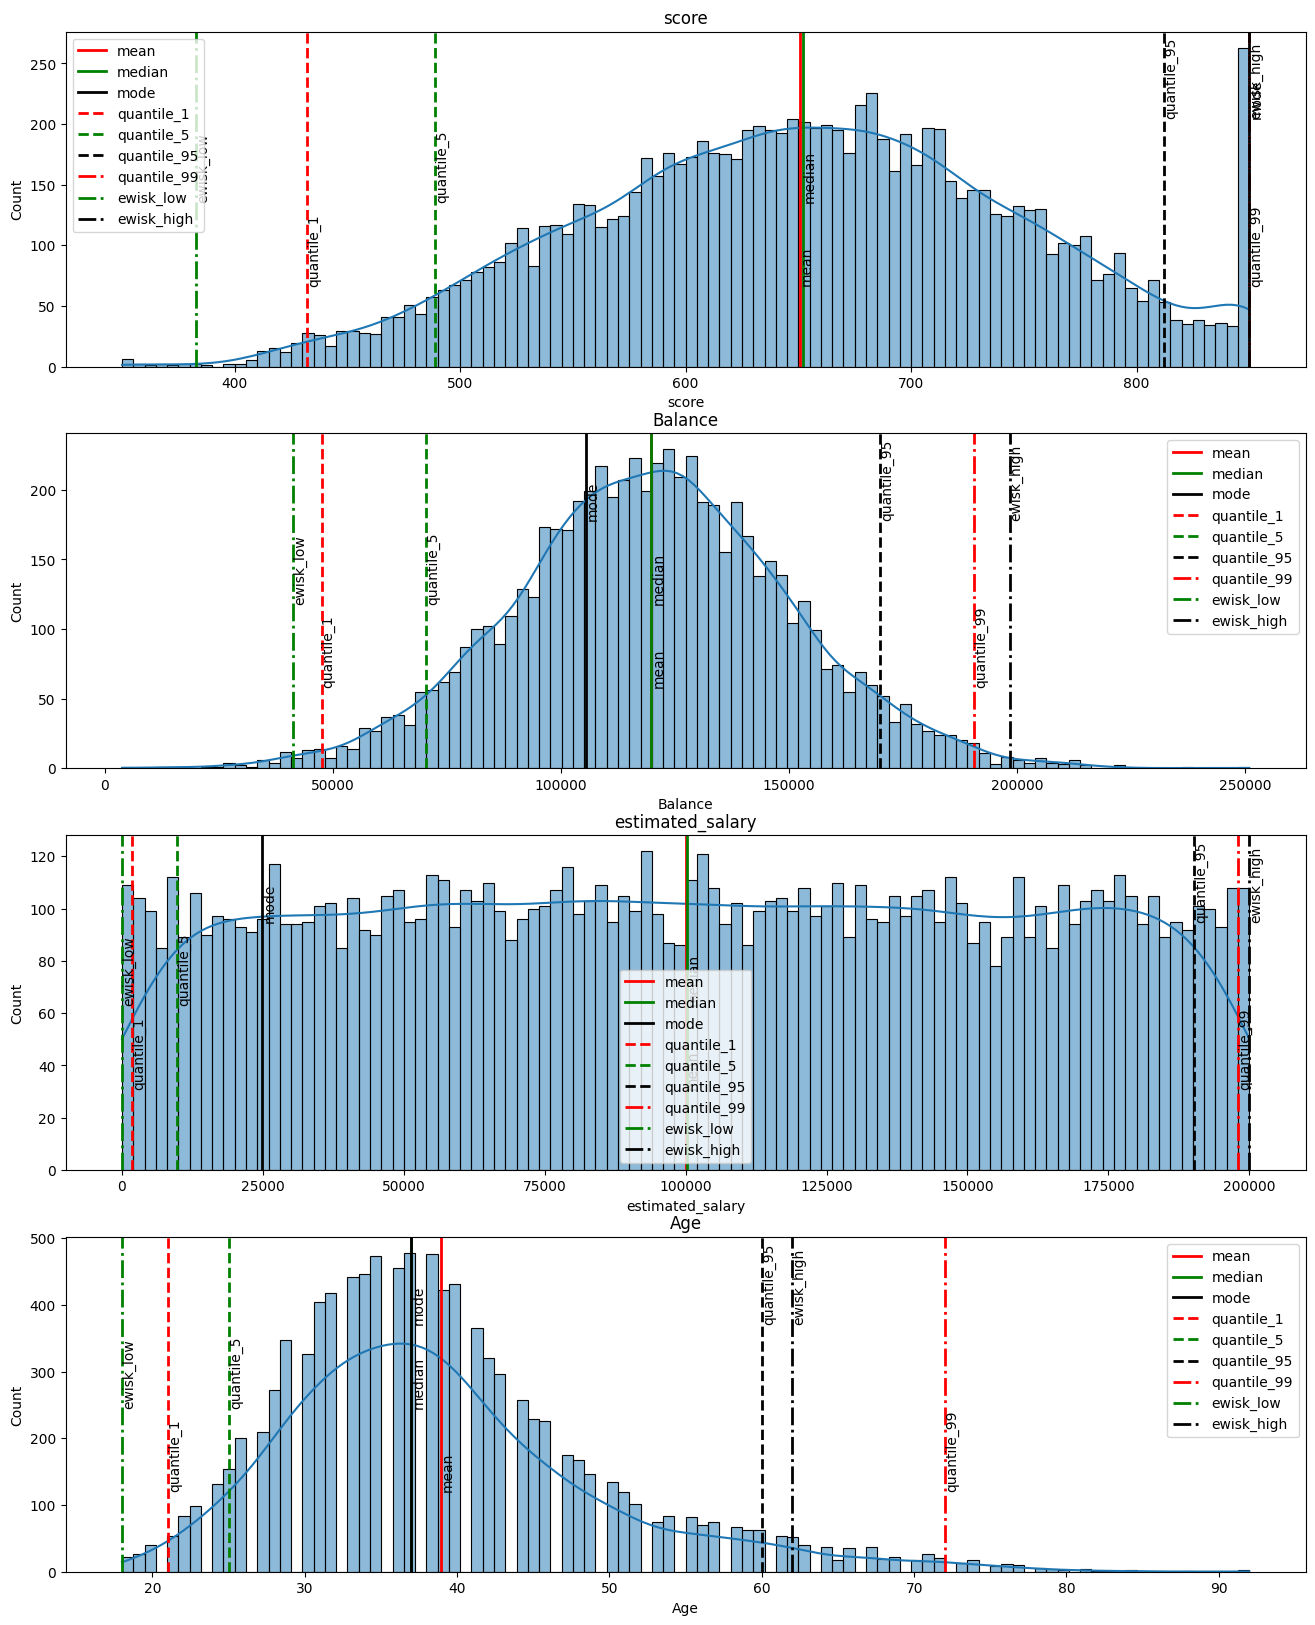

In [275]:
linestyler = [{'ls':style, 'c':color} for style in ['-','--','-.',':'] for color in 'rgk']
plt.subplots(len(features_num), 1, figsize = (16, 20))

for i,col in enumerate(features_num):
    series = df_num[col]
    stats = dict(df_num_stats[col])
    
    plt.subplot(len(features_num), 1, i+1)
    axes = sns.histplot(series, bins=100, kde=True)
    axes.set_title(col)
    for j,(k,v) in enumerate(stats.items()):
        l = axes.axvline(v, *axes.get_ylim(), linewidth=2, label=k, **linestyler[j])
        x_lbl = l.get_xdata()[0]
        y_lbl = ((j%3)+1)*axes.get_ylim()[1]//4 
        axes.annotate(k, (x_lbl, y_lbl), rotation=90)
    plt.legend()        